# Credit Card Lead Prediction

### PROBLEM STATEMENT :

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

### OBJECTIVE :

- Model Building, training the model and evaluating using the roc_auc_score (>75%) for the test set
- Help identify customers that could show higher intent towards obtaining a credit card

### DATA:

- Has Train and Test Datasets

### - Dataset:

    - ID:
    - Gender: 
    - Age:
    - Region_Code:
    - Occupation:
    - Channel_Code:
    - Vintage:
    - Credit_Product:
    - Avg_Account_Balance:
    - Is_Active:
    - Is_Lead(Target)

### Let us import the packages and load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df= pd.read_csv('train_credit.csv')
test_df= pd.read_csv('test_credit.csv')

train_df['source']='train'
test_df['source']='test'

## Exploratory Data Analysis

- Identifying the data types of diff variables/features
- Distribution & Description of/about the data
- Correlation between indep & dep var
- Correlation between indep among themselves (multicollinearity)
- Finding missing values
 -Identifying outliers
- Finding duplicate data
- Finding whther your dataset is imbalanced (for classification problems only)
- Finding insignificant features
- Data validity 
- Identifying which variable probably needs to be "Scaled"
- Identifying what type of encoding will be needed for the categorical variables

In [3]:
train_df.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,train


In [4]:
train_df.shape

(245725, 12)

In [5]:
test_df.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,source
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,test
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,test
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,test


In [6]:
test_df.shape

(105312, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
 11  source               245725 non-null  object
dtypes: int64(4), object(8)
memory usage: 22.5+ MB


In [8]:
combine_df=train_df.append(test_df)

In [9]:
combine_df.source.value_counts()

train    245725
test     105312
Name: source, dtype: int64

In [10]:
# Changing data type of categorical variables 

combine_df['Gender']= combine_df['Gender'].astype('category')
combine_df['Occupation']= combine_df['Occupation'].astype('category')
combine_df['Is_Active']= combine_df['Is_Active'].astype('category')
combine_df['Region_Code']= combine_df['Region_Code'].astype('category')
combine_df['Channel_Code']= combine_df['Channel_Code'].astype('category')
combine_df['Credit_Product']= combine_df['Credit_Product'].astype('category')

combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   351037 non-null  object  
 1   Gender               351037 non-null  category
 2   Age                  351037 non-null  int64   
 3   Region_Code          351037 non-null  category
 4   Occupation           351037 non-null  category
 5   Channel_Code         351037 non-null  category
 6   Vintage              351037 non-null  int64   
 7   Credit_Product       309190 non-null  category
 8   Avg_Account_Balance  351037 non-null  int64   
 9   Is_Active            351037 non-null  category
 10  Is_Lead              245725 non-null  float64 
 11  source               351037 non-null  object  
dtypes: category(6), float64(1), int64(3), object(2)
memory usage: 20.8+ MB


### Data Cleaning

In [11]:
# Checking null values

combine_df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

##### Is_Lead has null values from test dataframe, but we need to fix null values with CreditProduct

In [12]:
# Dealing with the null values of Credit_Product

combine_df['Credit_Product'].value_counts()

No     205965
Yes    103225
Name: Credit_Product, dtype: int64

In [13]:
# Filling with the "No" value since it is occuring more frequently

combine_df['Credit_Product'].fillna('Yes', inplace= True)

In [14]:
combine_df['Credit_Product']= combine_df['Credit_Product'].astype('category')

In [15]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   351037 non-null  object  
 1   Gender               351037 non-null  category
 2   Age                  351037 non-null  int64   
 3   Region_Code          351037 non-null  category
 4   Occupation           351037 non-null  category
 5   Channel_Code         351037 non-null  category
 6   Vintage              351037 non-null  int64   
 7   Credit_Product       351037 non-null  category
 8   Avg_Account_Balance  351037 non-null  int64   
 9   Is_Active            351037 non-null  category
 10  Is_Lead              245725 non-null  float64 
 11  source               351037 non-null  object  
dtypes: category(6), float64(1), int64(3), object(2)
memory usage: 20.8+ MB


In [16]:
train_df = combine_df[combine_df.source=='train']

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   245725 non-null  object  
 1   Gender               245725 non-null  category
 2   Age                  245725 non-null  int64   
 3   Region_Code          245725 non-null  category
 4   Occupation           245725 non-null  category
 5   Channel_Code         245725 non-null  category
 6   Vintage              245725 non-null  int64   
 7   Credit_Product       245725 non-null  category
 8   Avg_Account_Balance  245725 non-null  int64   
 9   Is_Active            245725 non-null  category
 10  Is_Lead              245725 non-null  float64 
 11  source               245725 non-null  object  
dtypes: category(6), float64(1), int64(3), object(2)
memory usage: 14.5+ MB


### Comprehending independent variables
#### Let's look into the categorical and numerical features in a seperate manner for better understanding

In [18]:
credit_categorical = train_df.select_dtypes(include = ['category','object']).copy()
credit_numerical = train_df.select_dtypes(include = ['int64','float64']).copy()

### Exploring Categorical variables: Bivariate Analysis

In [19]:
credit_categorical.head(4)

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,source
0,NNVBBKZB,Female,RG268,Other,X3,No,No,train
1,IDD62UNG,Female,RG277,Salaried,X1,No,No,train
2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes,train
3,BF3NC7KV,Male,RG270,Salaried,X1,No,No,train


In [20]:
credit_categorical.Gender.value_counts(normalize=True).round(2)

Male      0.55
Female    0.45
Name: Gender, dtype: float64

#### The percentage of Male customers (55%) is slightly more than the female customers  (45%)

In [21]:
credit_categorical.Occupation.value_counts(normalize=True).round(2)

Self_Employed    0.41
Salaried         0.29
Other            0.29
Entrepreneur     0.01
Name: Occupation, dtype: float64

#### Self employed customers (41%) are the highest, followed by salaried & other occupation customers (with an equal percentage of 29%), and entrepreneurs are insignificant

In [22]:
credit_categorical.Channel_Code.value_counts(normalize=True).round(2)

X1    0.42
X3    0.28
X2    0.28
X4    0.02
Name: Channel_Code, dtype: float64

#### The Customer Acquisition Channel code indicates the medium by which the customers signed up initially . We can see that there are 4 unique Channels- X1, X2, X3, X4

In [23]:
credit_categorical.Credit_Product.value_counts(normalize=True).round(2)

No     0.59
Yes    0.41
Name: Credit_Product, dtype: float64

In [24]:
credit_categorical.Is_Active.value_counts(normalize=True).round(2)

No     0.61
Yes    0.39
Name: Is_Active, dtype: float64

Let's visualize and further explore the categorical variables...

<Figure size 1296x1296 with 0 Axes>

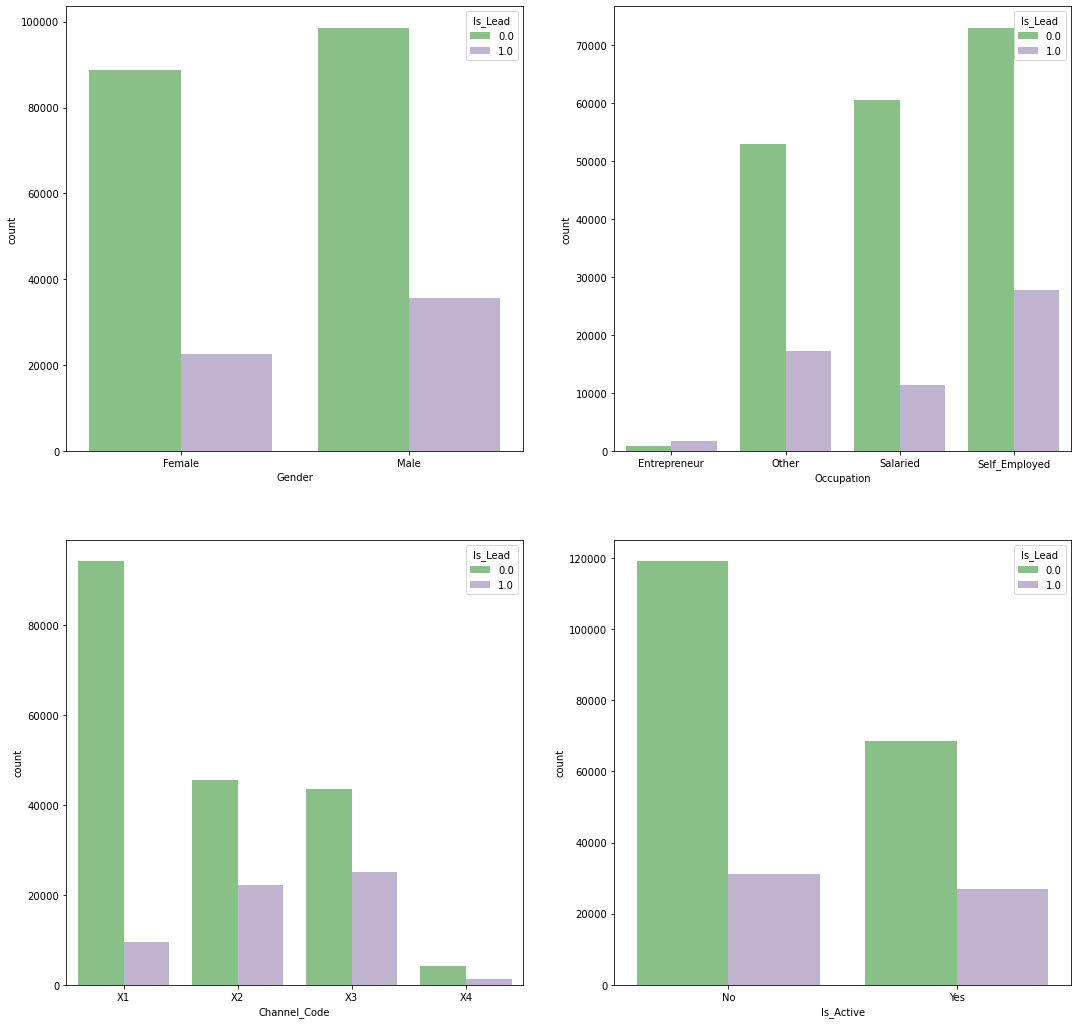

In [25]:
plt.figure(figsize=(18,18))
# sns.cubehelix_palette(as_cmap=True)

# sns.set_style('ticks')

fig,axs = plt.subplots(2,2, figsize=(18,18))
sns.countplot(x='Gender',hue='Is_Lead',data=combine_df, ax=axs[0,0], palette="Accent")
sns.countplot(x='Occupation',hue='Is_Lead',data=combine_df, ax=axs[0,1], palette="Accent")
sns.countplot(x='Channel_Code',hue='Is_Lead',data=combine_df, ax=axs[1,0], palette="Accent")
sns.countplot(x='Is_Active',hue='Is_Lead',data=combine_df, ax=axs[1,1], palette="Accent")

plt.show()


### Univariate Analysis: Numerical Variables

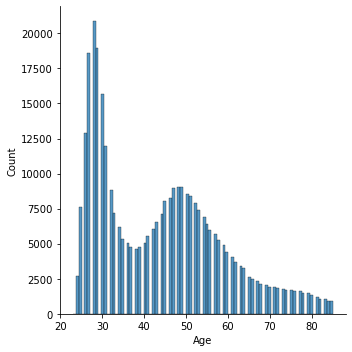

In [26]:
sns.displot(combine_df['Age'])

In [27]:
# Lets use the binning method to see the distribution of Age group

age_bin_list=[]
for age in combine_df['Age'].tolist():
    if age>65:
        age_bin_list.append('Senior')
    elif age>45:
        age_bin_list.append('Middle Aged')
    else:
        age_bin_list.append('Young')
        
combine_df['Age_bin']= age_bin_list

In [28]:
combine_df.Age_bin.value_counts()

Young          194420
Middle Aged    124163
Senior          32454
Name: Age_bin, dtype: int64

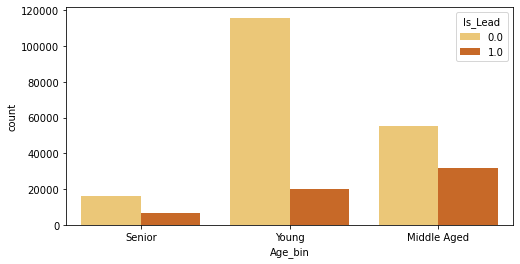

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x='Age_bin',hue='Is_Lead',data=combine_df,palette= 'YlOrBr')
plt.show()

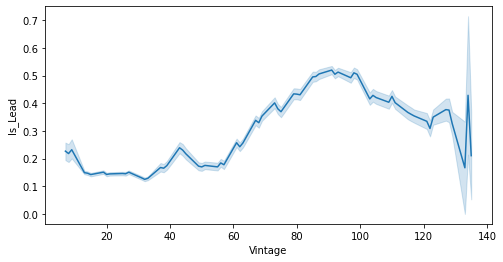

In [30]:
# Vintage customers who are interested for the credit card
plt.figure(figsize=(8,4))
sns.lineplot(data=combine_df,x='Vintage',y='Is_Lead')
plt.show()

# Data does not seem to be skewed very much

Skew is 2.97817033023345
Kurtosis is 14.347878980826728


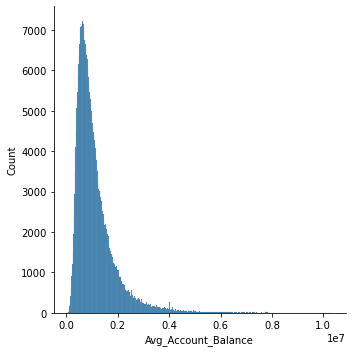

In [31]:
# Now lets take a look at Avg_account_balance

sns.displot(combine_df['Avg_Account_Balance'])

print("Skew is {}".format(combine_df['Avg_Account_Balance'].skew()))
print("Kurtosis is {}".format(combine_df['Avg_Account_Balance'].kurtosis()))

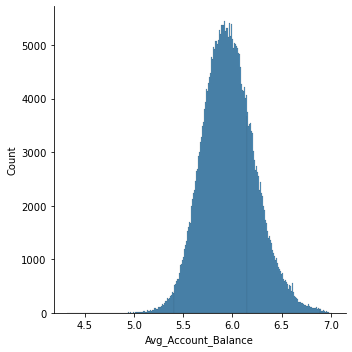

In [32]:
# Data is Skewed very much, lets use log to normalize it

combine_df['Avg_Account_Balance'] = np.log10(combine_df['Avg_Account_Balance'])
sns.displot(combine_df['Avg_Account_Balance'])

### Outlier detection

<AxesSubplot:xlabel='Vintage'>

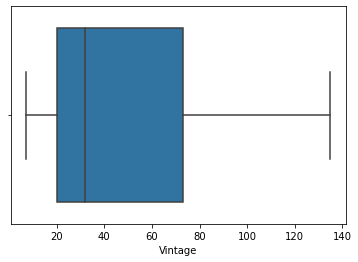

In [33]:
sns.boxplot(data = combine_df, x = 'Vintage')

# Outliers are not much with Vintage column

<AxesSubplot:xlabel='Age'>

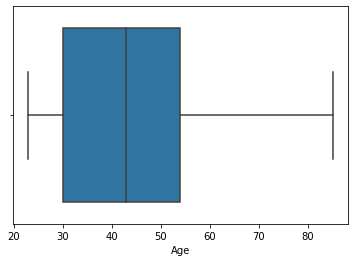

In [34]:
sns.boxplot(data = combine_df, x = 'Age')

# Outliers are not much with Vintage column

From the above, we can notice that percentage of customers interested in credit cards is 23.73% and not interested is 76.28%- Dataset is quite imbalanced.

Let's fix the imbalance in the Is_Lead dataset

### Label encoding : Converting Categorical variable into numeric 

#### We perform Label Encoding to convert the Gender, Is_Active, Credit_Product and Region_Code

In [35]:
combine_df['Gender'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [36]:
credit_categorical= ['Gender','Region_Code', 'Credit_Product', 'Is_Active', 'Age_bin']

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in credit_categorical:
    combine_df[column]= le.fit_transform(combine_df[column])

In [37]:
combine_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source,Age_bin
0,NNVBBKZB,0,73,18,Other,X3,43,0,6.019405,0,0.0,train,1
1,IDD62UNG,0,30,27,Salaried,X1,32,0,5.764914,0,0.0,train,2
2,HD3DSEMC,0,56,18,Self_Employed,X3,26,0,6.171526,1,0.0,train,0
3,BF3NC7KV,1,34,20,Salaried,X1,19,0,5.672517,0,0.0,train,2
4,TEASRWXV,0,30,32,Salaried,X1,33,0,5.947819,0,0.0,train,2


#### Performing OneHot Encoding on Channel Code & Occupation

In [38]:
combine_df['Channel_Code'].unique()

['X3', 'X1', 'X2', 'X4']
Categories (4, object): ['X3', 'X1', 'X2', 'X4']

In [39]:
chanel_code = pd.get_dummies(combine_df['Channel_Code'],  drop_first=False,  prefix_sep='_', prefix='chanel_code')
chanel_code.head(10)

,chanel_code_X1,chanel_code_X2,chanel_code_X3,chanel_code_X4
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,0,1,0,0


In [40]:
combine_df = pd.concat([combine_df, chanel_code], axis=1)
combine_df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source,Age_bin,chanel_code_X1,chanel_code_X2,chanel_code_X3,chanel_code_X4
0,NNVBBKZB,0,73,18,Other,X3,43,0,6.019405,0,0.0,train,1,0,0,1,0
1,IDD62UNG,0,30,27,Salaried,X1,32,0,5.764914,0,0.0,train,2,1,0,0,0


In [41]:
combine_df.drop('Channel_Code', axis=1, inplace=True)

In [42]:
combine_df.Occupation.unique()

['Other', 'Salaried', 'Self_Employed', 'Entrepreneur']
Categories (4, object): ['Other', 'Salaried', 'Self_Employed', 'Entrepreneur']

In [43]:
occupation = pd.get_dummies(combine_df['Occupation'],  drop_first=False,  prefix_sep='_', prefix='occupation')
occupation.head(3)

,occupation_Entrepreneur,occupation_Other,occupation_Salaried,occupation_Self_Employed
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1


In [44]:
combine_df = pd.concat([combine_df, occupation], axis=1)
combine_df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source,Age_bin,chanel_code_X1,chanel_code_X2,chanel_code_X3,chanel_code_X4,occupation_Entrepreneur,occupation_Other,occupation_Salaried,occupation_Self_Employed
0,NNVBBKZB,0,73,18,Other,43,0,6.019405,0,0.0,train,1,0,0,1,0,0,1,0,0
1,IDD62UNG,0,30,27,Salaried,32,0,5.764914,0,0.0,train,2,1,0,0,0,0,0,1,0


In [45]:
combine_df.drop('Occupation', axis=1, inplace=True)

## Checking correlation between target and independent variables:

<AxesSubplot:>

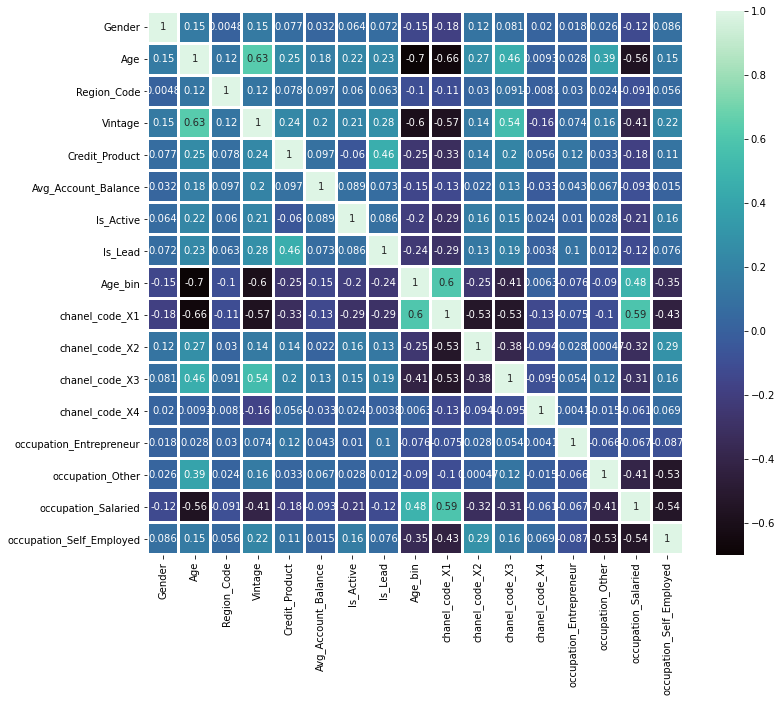

In [46]:
import matplotlib.pyplot as plt

train_df = combine_df[combine_df.source == 'train']
correlation = train_df.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation, linewidth=2, cmap="mako", annot=True) #jet

In [47]:
# combine_df.drop(columns=['chanel_code_X4','occupation_Self_Employed', 'Is_Active', 'occupation_Entrepreneur',
#                          'occupation_Other','Region_Code', 'Gender', 'Age_bin'], inplace=True)

# Since Age bin and Age are correlated with the same percentage and region_code is very weakly correlated
combine_df.drop(columns=['Region_Code', 'Age_bin'], inplace=True)

The variable with least value from target variable is least correlated. SO that variable can also be dropped later, in case it does not contribute to the model

### Understanding target variable

In [48]:
(train_df.Is_Lead.value_counts(normalize=True)*100).round(2)

0.0    76.28
1.0    23.72
Name: Is_Lead, dtype: float64

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64


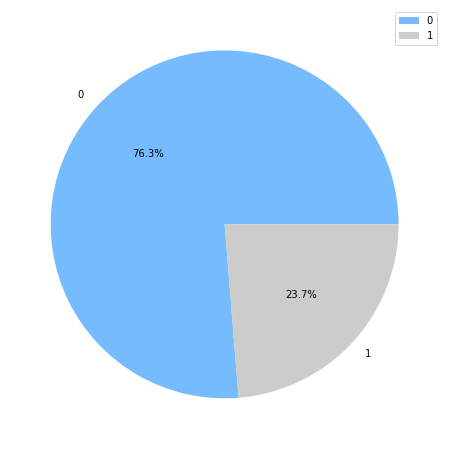

In [49]:
# Lets check the distribution of target variables and see how we can handle it

plt.figure(figsize = (10,8))
print(train_df['Is_Lead'].value_counts())
colors = ['xkcd:sky blue','0.8']
plt.pie(train_df['Is_Lead'].value_counts(), labels = ['0','1'], autopct='%.1f%%',colors= colors)
plt.legend()
plt.show()

# There is an imbalance in the distribution of target variables, we can check if that affects the performance later in the graph

From the above, we can notice that percentage of customers interested in credit cards is 23.73% and not interested is 76.28%- Dataset is quite imbalanced.

Let's fix the imbalance in the Is_Lead dataset

We can scale the data using Standard scalar, by first divide train into train & test sets and standardize to not get a data leakage

### Model Building

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [51]:
combine_df_copy = combine_df.copy(deep=True)
combine_df = combine_df.drop(['Avg_Account_Balance'], axis=1)

train_df = combine_df[combine_df.source == 'train'].drop(['source', 'ID'], axis=1)
test_df = combine_df[combine_df.source == 'test'].drop(['source', 'ID'], axis=1)

#### 1. Standardizing the dataset

In [52]:
credit_numerical = train_df.loc[:, train_df.columns != 'Is_Lead'].select_dtypes(include = ['int64','float64']).copy()

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data_sc= sc.fit_transform(credit_numerical)

train_df_std = pd.DataFrame(data_sc, columns=credit_numerical.columns.tolist())

In [53]:
for col in train_df_std.columns.to_list():
    train_df[col]=train_df_std[col]

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Gender                    245725 non-null  int32  
 1   Age                       245725 non-null  float64
 2   Vintage                   245725 non-null  float64
 3   Credit_Product            245725 non-null  int32  
 4   Is_Active                 245725 non-null  int32  
 5   Is_Lead                   245725 non-null  float64
 6   chanel_code_X1            245725 non-null  uint8  
 7   chanel_code_X2            245725 non-null  uint8  
 8   chanel_code_X3            245725 non-null  uint8  
 9   chanel_code_X4            245725 non-null  uint8  
 10  occupation_Entrepreneur   245725 non-null  uint8  
 11  occupation_Other          245725 non-null  uint8  
 12  occupation_Salaried       245725 non-null  uint8  
 13  occupation_Self_Employed  245725 non-null  u

In [55]:
y=train_df['Is_Lead'].astype('int')
X=train_df.drop(['Is_Lead'], axis=1)

#### 2. Balancing the dataset using imblean (SMOTE)

In [56]:
smote= SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X,y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=15, stratify=y_smote)

In [58]:
# Preparing the test_df with the same format as train for final predictions on unseen data

test_df = combine_df[combine_df.source=='test']
test_df.head()
test_df=test_df.drop(['Is_Lead','source','ID'], axis=1)
test_df_credit_numerical = test_df.select_dtypes(include = ['int64','float64']).copy()
test_data_sc= sc.transform(test_df_credit_numerical)

test_df_std = pd.DataFrame(test_data_sc, columns=test_df_credit_numerical.columns.tolist())

for col in test_df_credit_numerical.columns.to_list():
    test_df[col]=test_df_std[col]

### Model 1- Using Logistic Regression

In [59]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)   # training should be done on the training set.
# fetch the accuracy of the model
LR.score(X_test, y_test)

y_pred = LR.predict(X_test)  # predicted classs labels
y_pred[:20]

# Fetch the prob.... ?
prob_values = LR.predict_proba(X_test)
prob_values

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     56232
           1       0.76      0.80      0.78     56231

    accuracy                           0.77    112463
   macro avg       0.78      0.77      0.77    112463
weighted avg       0.78      0.77      0.77    112463



#### Plotting ROC Curve after confusion matrix

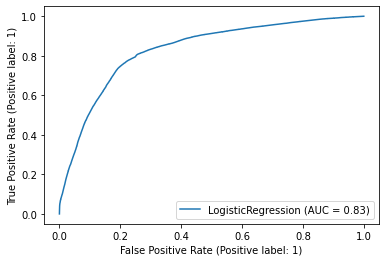

In [60]:
plot_roc_curve(LR, X_test, y_test) 

In [61]:
# Testing on Unseen Data
LR_final_pred = LR.predict_proba(test_df)

# Accuracy on unseen data is AUC-82%

### Model 2 - Using LDA, RandomForestClassifier

In [62]:
# To avoid overfitting we can try to use LDA if it can improve the efficiency

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA.score(X_test, y_test)


y_pred = LDA.predict(X_test)  # predicted classs labels
y_pred[:20]

# Fetch the prob to see the accuracy
prob_values = LDA.predict_proba(X_test)
prob_values

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77     56232
           1       0.76      0.81      0.78     56231

    accuracy                           0.77    112463
   macro avg       0.78      0.77      0.77    112463
weighted avg       0.78      0.77      0.77    112463



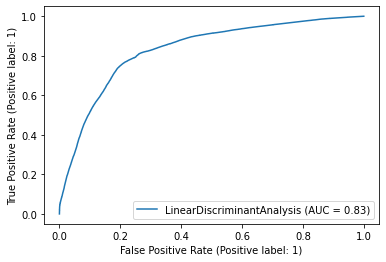

In [63]:
plot_roc_curve(LDA, X_test, y_test) 

In [64]:
lda_pred_final = LDA.predict_proba(test_df)

# Still the accuracy is only 82.7%

### Random Forest Classifier

In [65]:
# Now let us try Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
rfc_pred = rfc.predict(X_test)

rfc_auc = roc_auc_score(y_test, rfc_pred)
rfc_auc

0.8250266853545933

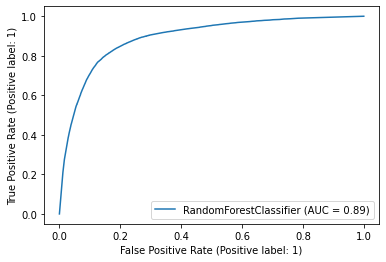

In [67]:
plot_roc_curve(rfc, X_test, y_test) 

In [68]:
# Predictions Does not increase much with normal parameters, lets try to tune the parameters using GridSearchCV

possible_params = {
    'n_estimators': [10, 100, 1000],
    'max_depth' : [5,6]
}

gs = model_selection.GridSearchCV(estimator=rfc, param_grid=possible_params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6], 'n_estimators': [10, 100, 1000]})

In [69]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 10}

In [70]:
rfc_tuned = RandomForestClassifier(**gs.best_params_)

rfc_tuned.fit(X_train, y_train)
rfc_pred = rfc_tuned.predict(X_test)
rfc_auc = roc_auc_score(y_test, rfc_pred)
rfc_auc

0.786632058451275

In [71]:
# Lets use the original RFC model for this
rfc_pred_final = rfc.predict_proba(test_df)

#### XG Boost

In [72]:
# Let us use this with cross validation to get better results

def my_cross_validation_model(train,targets,model,params, folds=9):    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_temp,test_temp) in enumerate(skf.split(train,targets)):
        
        # Split trining and test for cross validation
        x_train,y_train = train.iloc[train_temp], targets.iloc[train_temp]
        x_test,y_test = train.iloc[test_temp],targets.iloc[test_temp]
    
        models=model(**params)
        models.fit(x_train,y_train,
                  eval_set=[(x_test, y_test)],
                  early_stopping_rounds=100,
                  verbose=400)
    
        pred = models.predict_proba(x_test)[:, 1]
        roc = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc}")
        print("-"*50)
        
    return models

In [73]:
## Now using XGBoost

xgb_params={'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

result_xgb = my_cross_validation_model(X_train,y_train,XGBClassifier,xgb_params)
# xgb.fit(X_train, y_train)

[10:13:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.69295


C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50480
[800]	validation_0-logloss:0.47898
[1200]	validation_0-logloss:0.47116
[1600]	validation_0-logloss:0.46616
[2000]	validation_0-logloss:0.46193
[2400]	validation_0-logloss:0.45909
[2800]	validation_0-logloss:0.45589
[3200]	validation_0-logloss:0.45225
[3600]	validation_0-logloss:0.44918
[4000]	validation_0-logloss:0.44657
[4400]	validation_0-logloss:0.44353
[4800]	validation_0-logloss:0.44090
[5200]	validation_0-logloss:0.43880
[5600]	validation_0-logloss:0.43615
[6000]	validation_0-logloss:0.43449
[6400]	validation_0-logloss:0.43257
[6800]	validation_0-logloss:0.43116
[7200]	validation_0-logloss:0.42997
[7600]	validation_0-logloss:0.42833
[8000]	validation_0-logloss:0.42669
[8400]	validation_0-logloss:0.42505
[8800]	validation_0-logloss:0.42330
[9200]	validation_0-logloss:0.42174
[9600]	validation_0-logloss:0.42020
[10000]	validation_0-logloss:0.41893
[10400]	validation_0-logloss:0.41763
[10800]	validation_0-logloss:0.41600
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50247
[800]	validation_0-logloss:0.47533
[1200]	validation_0-logloss:0.46800
[1600]	validation_0-logloss:0.46300
[2000]	validation_0-logloss:0.45900
[2400]	validation_0-logloss:0.45567
[2800]	validation_0-logloss:0.45271
[3200]	validation_0-logloss:0.44938
[3600]	validation_0-logloss:0.44635
[4000]	validation_0-logloss:0.44361
[4400]	validation_0-logloss:0.44053
[4800]	validation_0-logloss:0.43793
[5200]	validation_0-logloss:0.43566
[5600]	validation_0-logloss:0.43362
[6000]	validation_0-logloss:0.43186
[6400]	validation_0-logloss:0.43014
[6800]	validation_0-logloss:0.42880
[7200]	validation_0-logloss:0.42765
[7600]	validation_0-logloss:0.42600
[8000]	validation_0-logloss:0.42415
[8400]	validation_0-logloss:0.42275
[8800]	validation_0-logloss:0.42099
[9200]	validation_0-logloss:0.41938
[9600]	validation_0-logloss:0.41781
[10000]	validation_0-logloss:0.41681
[10400]	validation_0-logloss:0.41548
[10800]	validation_0-logloss:0.41378
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50470
[800]	validation_0-logloss:0.47845
[1200]	validation_0-logloss:0.47114
[1600]	validation_0-logloss:0.46634
[2000]	validation_0-logloss:0.46218
[2400]	validation_0-logloss:0.45910
[2800]	validation_0-logloss:0.45645
[3200]	validation_0-logloss:0.45265
[3600]	validation_0-logloss:0.44959
[4000]	validation_0-logloss:0.44726
[4400]	validation_0-logloss:0.44456
[4800]	validation_0-logloss:0.44223
[5200]	validation_0-logloss:0.43997
[5600]	validation_0-logloss:0.43769
[6000]	validation_0-logloss:0.43570
[6400]	validation_0-logloss:0.43363
[6800]	validation_0-logloss:0.43199
[7200]	validation_0-logloss:0.43094
[7600]	validation_0-logloss:0.42914
[8000]	validation_0-logloss:0.42749
[8400]	validation_0-logloss:0.42629
[8800]	validation_0-logloss:0.42459
[9200]	validation_0-logloss:0.42308
[9600]	validation_0-logloss:0.42152
[10000]	validation_0-logloss:0.42053
[10400]	validation_0-logloss:0.41919
[10800]	validation_0-logloss:0.41738
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50019
[800]	validation_0-logloss:0.47374
[1200]	validation_0-logloss:0.46607
[1600]	validation_0-logloss:0.46090
[2000]	validation_0-logloss:0.45674
[2400]	validation_0-logloss:0.45388
[2800]	validation_0-logloss:0.45108
[3200]	validation_0-logloss:0.44748
[3600]	validation_0-logloss:0.44440
[4000]	validation_0-logloss:0.44191
[4400]	validation_0-logloss:0.43892
[4800]	validation_0-logloss:0.43677
[5200]	validation_0-logloss:0.43459
[5600]	validation_0-logloss:0.43229
[6000]	validation_0-logloss:0.43031
[6400]	validation_0-logloss:0.42859
[6800]	validation_0-logloss:0.42710
[7200]	validation_0-logloss:0.42587
[7600]	validation_0-logloss:0.42402
[8000]	validation_0-logloss:0.42245
[8400]	validation_0-logloss:0.42084
[8800]	validation_0-logloss:0.41913
[9200]	validation_0-logloss:0.41752
[9600]	validation_0-logloss:0.41598
[10000]	validation_0-logloss:0.41484
[10400]	validation_0-logloss:0.41345
[10800]	validation_0-logloss:0.41165
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50424
[800]	validation_0-logloss:0.47918
[1200]	validation_0-logloss:0.47207
[1600]	validation_0-logloss:0.46739
[2000]	validation_0-logloss:0.46319
[2400]	validation_0-logloss:0.46020
[2800]	validation_0-logloss:0.45708
[3200]	validation_0-logloss:0.45360
[3600]	validation_0-logloss:0.45035
[4000]	validation_0-logloss:0.44781
[4400]	validation_0-logloss:0.44468
[4800]	validation_0-logloss:0.44192
[5200]	validation_0-logloss:0.43975
[5600]	validation_0-logloss:0.43695
[6000]	validation_0-logloss:0.43518
[6400]	validation_0-logloss:0.43340
[6800]	validation_0-logloss:0.43169
[7200]	validation_0-logloss:0.43039
[7600]	validation_0-logloss:0.42853
[8000]	validation_0-logloss:0.42685
[8400]	validation_0-logloss:0.42529
[8800]	validation_0-logloss:0.42323
[9200]	validation_0-logloss:0.42151
[9600]	validation_0-logloss:0.42017
[10000]	validation_0-logloss:0.41918
[10400]	validation_0-logloss:0.41789
[10800]	validation_0-logloss:0.41623
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50321
[800]	validation_0-logloss:0.47752
[1200]	validation_0-logloss:0.47045
[1600]	validation_0-logloss:0.46563
[2000]	validation_0-logloss:0.46148
[2400]	validation_0-logloss:0.45834
[2800]	validation_0-logloss:0.45556
[3200]	validation_0-logloss:0.45238
[3600]	validation_0-logloss:0.44935
[4000]	validation_0-logloss:0.44682
[4400]	validation_0-logloss:0.44369
[4800]	validation_0-logloss:0.44112
[5200]	validation_0-logloss:0.43884
[5600]	validation_0-logloss:0.43621
[6000]	validation_0-logloss:0.43435
[6400]	validation_0-logloss:0.43247
[6800]	validation_0-logloss:0.43088
[7200]	validation_0-logloss:0.42966
[7600]	validation_0-logloss:0.42803
[8000]	validation_0-logloss:0.42619
[8400]	validation_0-logloss:0.42449
[8800]	validation_0-logloss:0.42277
[9200]	validation_0-logloss:0.42128
[9600]	validation_0-logloss:0.41982
[10000]	validation_0-logloss:0.41863
[10400]	validation_0-logloss:0.41706
[10800]	validation_0-logloss:0.41550
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50047
[800]	validation_0-logloss:0.47294
[1200]	validation_0-logloss:0.46496
[1600]	validation_0-logloss:0.45993
[2000]	validation_0-logloss:0.45567
[2400]	validation_0-logloss:0.45253
[2800]	validation_0-logloss:0.44967
[3200]	validation_0-logloss:0.44600
[3600]	validation_0-logloss:0.44332
[4000]	validation_0-logloss:0.44061
[4400]	validation_0-logloss:0.43784
[4800]	validation_0-logloss:0.43496
[5200]	validation_0-logloss:0.43271
[5600]	validation_0-logloss:0.43021
[6000]	validation_0-logloss:0.42850
[6400]	validation_0-logloss:0.42675
[6800]	validation_0-logloss:0.42522
[7200]	validation_0-logloss:0.42406
[7600]	validation_0-logloss:0.42249
[8000]	validation_0-logloss:0.42093
[8400]	validation_0-logloss:0.41950
[8800]	validation_0-logloss:0.41749
[9200]	validation_0-logloss:0.41600
[9600]	validation_0-logloss:0.41464
[10000]	validation_0-logloss:0.41362
[10400]	validation_0-logloss:0.41230
[10800]	validation_0-logloss:0.41093
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50096
[800]	validation_0-logloss:0.47981
[1200]	validation_0-logloss:0.47137
[1600]	validation_0-logloss:0.46536
[2000]	validation_0-logloss:0.46165
[2400]	validation_0-logloss:0.45879
[2800]	validation_0-logloss:0.45605
[3200]	validation_0-logloss:0.45240
[3600]	validation_0-logloss:0.44981
[4000]	validation_0-logloss:0.44726
[4400]	validation_0-logloss:0.44429
[4800]	validation_0-logloss:0.44181
[5200]	validation_0-logloss:0.43921
[5600]	validation_0-logloss:0.43696
[6000]	validation_0-logloss:0.43485
[6400]	validation_0-logloss:0.43296
[6800]	validation_0-logloss:0.43091
[7200]	validation_0-logloss:0.42908
[7600]	validation_0-logloss:0.42773
[8000]	validation_0-logloss:0.42622
[8400]	validation_0-logloss:0.42462
[8800]	validation_0-logloss:0.42293
[9200]	validation_0-logloss:0.42163
[9600]	validation_0-logloss:0.41990
[10000]	validation_0-logloss:0.41859
[10400]	validation_0-logloss:0.41707
[10800]	validation_0-logloss:0.41600
[11200]	validation_0-loglos

C:\Users\gayathri.gopalan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[400]	validation_0-logloss:0.50131
[800]	validation_0-logloss:0.47924
[1200]	validation_0-logloss:0.47087
[1600]	validation_0-logloss:0.46491
[2000]	validation_0-logloss:0.46119
[2400]	validation_0-logloss:0.45819
[2800]	validation_0-logloss:0.45580
[3200]	validation_0-logloss:0.45183
[3600]	validation_0-logloss:0.44921
[4000]	validation_0-logloss:0.44636
[4400]	validation_0-logloss:0.44310
[4800]	validation_0-logloss:0.44058
[5200]	validation_0-logloss:0.43816
[5600]	validation_0-logloss:0.43597
[6000]	validation_0-logloss:0.43390
[6400]	validation_0-logloss:0.43209
[6800]	validation_0-logloss:0.43028
[7200]	validation_0-logloss:0.42803
[7600]	validation_0-logloss:0.42679
[8000]	validation_0-logloss:0.42528
[8400]	validation_0-logloss:0.42346
[8800]	validation_0-logloss:0.42199
[9200]	validation_0-logloss:0.42056
[9600]	validation_0-logloss:0.41885
[10000]	validation_0-logloss:0.41741
[10400]	validation_0-logloss:0.41594
[10800]	validation_0-logloss:0.41449
[11200]	validation_0-loglos

In [ ]:
result_xgb.best

In [74]:
xgb_predict = result_xgb.predict(X_test)
xgb_auc_score = roc_auc_score(y_test, xgb_predict)
xgb_auc_score

0.8314912565120335

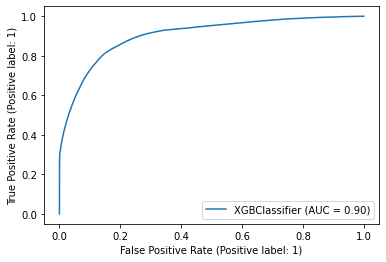

In [75]:
plot_roc_curve(result_xgb, X_test, y_test) 

In [76]:
xgb_pred_final = result_xgb.predict_proba(test_df)

### LGBMClassifier

In [77]:
from lightgbm import LGBMClassifier

In [78]:
clf = LGBMClassifier(
            n_jobs=-1,
            learning_rate=0.00094,
            n_estimators=10000,
            colsample_bytree=0.94,
            subsample = 0.75,
            subsample_freq = 1,
            reg_alpha= 1.0,
            reg_lambda = 5.0
        )

clf.fit(X_train, y_train, eval_metric='auc')

LGBMClassifier(colsample_bytree=0.94, learning_rate=0.00094, n_estimators=10000,
               reg_alpha=1.0, reg_lambda=5.0, subsample=0.75, subsample_freq=1)

In [79]:
lgbm_pred=clf.predict_proba(test_df)

In [80]:
lgbm_predict = clf.predict(X_test)
lgbm_auc_score = roc_auc_score(y_test, lgbm_predict)
lgbm_auc_score

0.8321225936789072

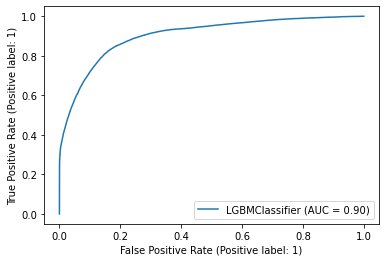

In [81]:
plot_roc_curve(clf, X_test, y_test) 

### CatBoost Classifier

In [82]:
cat_params= {'n_estimators': 20000, 
                  'depth': 4, 
                  'learning_rate': 0.023, 
                  'colsample_bylevel': 0.655, 
                  'bagging_temperature': 0.921, 
                  'l2_leaf_reg': 10.133}

In [83]:
result_cat_boost=my_cross_validation_model(X_train,y_train,CatBoostClassifier,cat_params)

0:	learn: 0.6826957	test: 0.6828182	best: 0.6828182 (0)	total: 196ms	remaining: 1h 5m 17s
400:	learn: 0.4488315	test: 0.4519850	best: 0.4519850 (400)	total: 8.87s	remaining: 7m 13s
800:	learn: 0.4180306	test: 0.4208315	best: 0.4208315 (800)	total: 18.2s	remaining: 7m 15s
1200:	learn: 0.3997503	test: 0.4024488	best: 0.4024488 (1200)	total: 27.5s	remaining: 7m 10s
1600:	learn: 0.3875958	test: 0.3901265	best: 0.3901265 (1600)	total: 36.6s	remaining: 7m
2000:	learn: 0.3785865	test: 0.3809407	best: 0.3809407 (2000)	total: 45.5s	remaining: 6m 48s
2400:	learn: 0.3701720	test: 0.3724139	best: 0.3724120 (2399)	total: 55.1s	remaining: 6m 43s
2800:	learn: 0.3651064	test: 0.3674328	best: 0.3674328 (2800)	total: 1m 3s	remaining: 6m 31s
3200:	learn: 0.3605930	test: 0.3629380	best: 0.3629380 (3200)	total: 1m 12s	remaining: 6m 20s
3600:	learn: 0.3572025	test: 0.3595780	best: 0.3595779 (3599)	total: 1m 21s	remaining: 6m 8s
4000:	learn: 0.3546220	test: 0.3571128	best: 0.3571128 (4000)	total: 1m 30s	rema

18800:	learn: 0.3358368	test: 0.3448332	best: 0.3448330 (18771)	total: 6m 56s	remaining: 26.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3448187322
bestIteration = 18933

Shrink model to first 18934 iterations.
roc_auc_score: 0.9221992335465125
--------------------------------------------------
0:	learn: 0.6826142	test: 0.6826776	best: 0.6826776 (0)	total: 32ms	remaining: 10m 39s
400:	learn: 0.4473144	test: 0.4496329	best: 0.4496329 (400)	total: 8.54s	remaining: 6m 57s
800:	learn: 0.4175877	test: 0.4210449	best: 0.4210449 (800)	total: 18.1s	remaining: 7m 13s
1200:	learn: 0.3997140	test: 0.4033744	best: 0.4033744 (1200)	total: 27.2s	remaining: 7m 5s
1600:	learn: 0.3871811	test: 0.3908734	best: 0.3908721 (1599)	total: 36.4s	remaining: 6m 58s
2000:	learn: 0.3777519	test: 0.3815405	best: 0.3815405 (2000)	total: 45.1s	remaining: 6m 45s
2400:	learn: 0.3700306	test: 0.3741194	best: 0.3741194 (2400)	total: 54.9s	remaining: 6m 42s
2800:	learn: 0.3645673	test: 0.368746

12400:	learn: 0.3391826	test: 0.3432480	best: 0.3432480 (12400)	total: 4m 38s	remaining: 2m 50s
12800:	learn: 0.3389123	test: 0.3431417	best: 0.3431409 (12783)	total: 4m 46s	remaining: 2m 41s
13200:	learn: 0.3386405	test: 0.3430167	best: 0.3430167 (13200)	total: 4m 56s	remaining: 2m 32s
13600:	learn: 0.3383903	test: 0.3429154	best: 0.3429152 (13597)	total: 5m 4s	remaining: 2m 23s
14000:	learn: 0.3381670	test: 0.3428337	best: 0.3428335 (13999)	total: 5m 12s	remaining: 2m 13s
14400:	learn: 0.3379401	test: 0.3427439	best: 0.3427439 (14400)	total: 5m 20s	remaining: 2m 4s
14800:	learn: 0.3377453	test: 0.3426747	best: 0.3426747 (14800)	total: 5m 29s	remaining: 1m 55s
15200:	learn: 0.3375375	test: 0.3426018	best: 0.3426017 (15176)	total: 5m 38s	remaining: 1m 46s
15600:	learn: 0.3373409	test: 0.3425416	best: 0.3425416 (15599)	total: 5m 46s	remaining: 1m 37s
16000:	learn: 0.3371524	test: 0.3424805	best: 0.3424800 (15997)	total: 5m 56s	remaining: 1m 28s
16400:	learn: 0.3369612	test: 0.3424324	be

8400:	learn: 0.3431386	test: 0.3434522	best: 0.3434522 (8400)	total: 3m 18s	remaining: 4m 33s
8800:	learn: 0.3426278	test: 0.3430747	best: 0.3430744 (8799)	total: 3m 28s	remaining: 4m 25s
9200:	learn: 0.3421632	test: 0.3427818	best: 0.3427816 (9197)	total: 3m 42s	remaining: 4m 20s
9600:	learn: 0.3417276	test: 0.3425209	best: 0.3425209 (9600)	total: 3m 58s	remaining: 4m 18s
10000:	learn: 0.3413678	test: 0.3422760	best: 0.3422760 (10000)	total: 4m 13s	remaining: 4m 13s
10400:	learn: 0.3410308	test: 0.3420843	best: 0.3420843 (10400)	total: 4m 28s	remaining: 4m 7s
10800:	learn: 0.3406907	test: 0.3419098	best: 0.3419098 (10800)	total: 4m 41s	remaining: 3m 59s
11200:	learn: 0.3403706	test: 0.3417496	best: 0.3417496 (11200)	total: 4m 52s	remaining: 3m 49s
11600:	learn: 0.3400658	test: 0.3415996	best: 0.3415993 (11597)	total: 5m 3s	remaining: 3m 39s
12000:	learn: 0.3397919	test: 0.3414955	best: 0.3414953 (11998)	total: 5m 13s	remaining: 3m 28s
12400:	learn: 0.3395276	test: 0.3413644	best: 0.34

4800:	learn: 0.3497713	test: 0.3563933	best: 0.3563933 (4800)	total: 2m 2s	remaining: 6m 27s
5200:	learn: 0.3483688	test: 0.3552262	best: 0.3552262 (5200)	total: 2m 12s	remaining: 6m 16s
5600:	learn: 0.3471177	test: 0.3542160	best: 0.3542160 (5600)	total: 2m 23s	remaining: 6m 8s
6000:	learn: 0.3460051	test: 0.3533375	best: 0.3533375 (6000)	total: 2m 33s	remaining: 5m 57s
6400:	learn: 0.3451260	test: 0.3526754	best: 0.3526754 (6400)	total: 2m 43s	remaining: 5m 46s
6800:	learn: 0.3443389	test: 0.3521228	best: 0.3521225 (6795)	total: 2m 53s	remaining: 5m 36s
7200:	learn: 0.3436556	test: 0.3516489	best: 0.3516489 (7200)	total: 3m 3s	remaining: 5m 26s
7600:	learn: 0.3430297	test: 0.3512520	best: 0.3512520 (7600)	total: 3m 13s	remaining: 5m 16s
8000:	learn: 0.3424910	test: 0.3509404	best: 0.3509404 (8000)	total: 3m 26s	remaining: 5m 9s
8400:	learn: 0.3419941	test: 0.3506674	best: 0.3506674 (8400)	total: 3m 37s	remaining: 5m
8800:	learn: 0.3415229	test: 0.3504170	best: 0.3504170 (8800)	total:

In [84]:
cat_boost_pred_final= result_cat_boost.predict_proba(test_df)

### Combining multiple models to get better results (Ensemble Approach)

In [85]:
final_prob_score = pd.DataFrame()
final_prob_score = (cat_boost_pred_final + lgbm_pred + xgb_pred_final)/3

In [86]:
catboost_df = pd.DataFrame(cat_boost_pred_final, columns=['Is_Not_Lead', 'Is_Lead'])
catboost_df.drop(columns=['Is_Not_Lead'], inplace=True)

xgb_df = pd.DataFrame(xgb_pred_final, columns=['Is_Not_Lead', 'Is_Lead'])
xgb_df.drop(columns=['Is_Not_Lead'], inplace=True)

lgbm_df = pd.DataFrame(lgbm_pred, columns=['Is_Not_Lead', 'Is_Lead'])
lgbm_df.drop(columns=['Is_Not_Lead'], inplace=True)

In [87]:
final_df = pd.DataFrame()
final_df['ID'] = combine_df[combine_df.source=='test']['ID'].tolist()
final_df['Is_Lead'] = (catboost_df['Is_Lead'] + xgb_df['Is_Lead'] + lgbm_df['Is_Lead'])/3

In [88]:
final_df.to_csv("submission.csv", index=False)